In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_prediction_dataset.csv')

print(df.shape)
df.head()

(100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


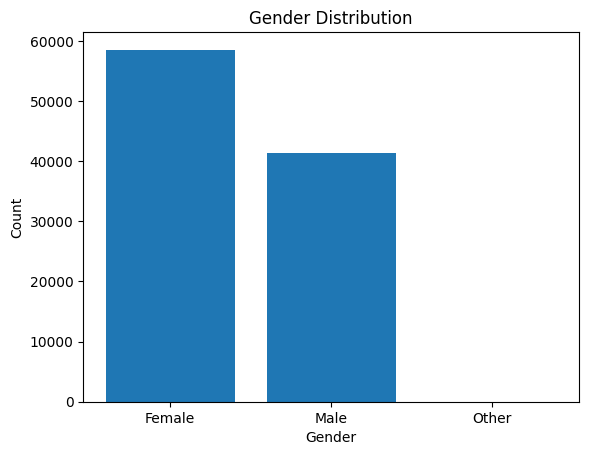

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame

# Count the number of occurrences for each gender
gender_counts = df['gender'].value_counts()

# Create a bar plot
plt.bar(gender_counts.index, gender_counts.values)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Display the plot
plt.show()

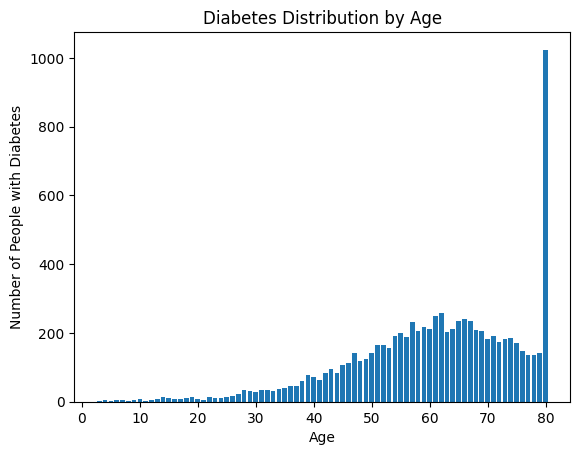

In [76]:
# Filter the DataFrame to include only people with diabetes
diabetes_df = df[df['diabetes'] == 1]

# Count the number of people with diabetes by age group
age_counts = diabetes_df['age'].value_counts().sort_index()

# Create a bar plot
plt.bar(age_counts.index, age_counts.values)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of People with Diabetes')
plt.title('Diabetes Distribution by Age')

# Display the plot
plt.show()

In [80]:
# Count the occurrences of "no_info" in the smoking_history column
no_info_count = df['smoking_history'].value_counts()['No Info']

print("Number of 'no_info' occurrences in smoking_history:", no_info_count)

Number of 'no_info' occurrences in smoking_history: 35816


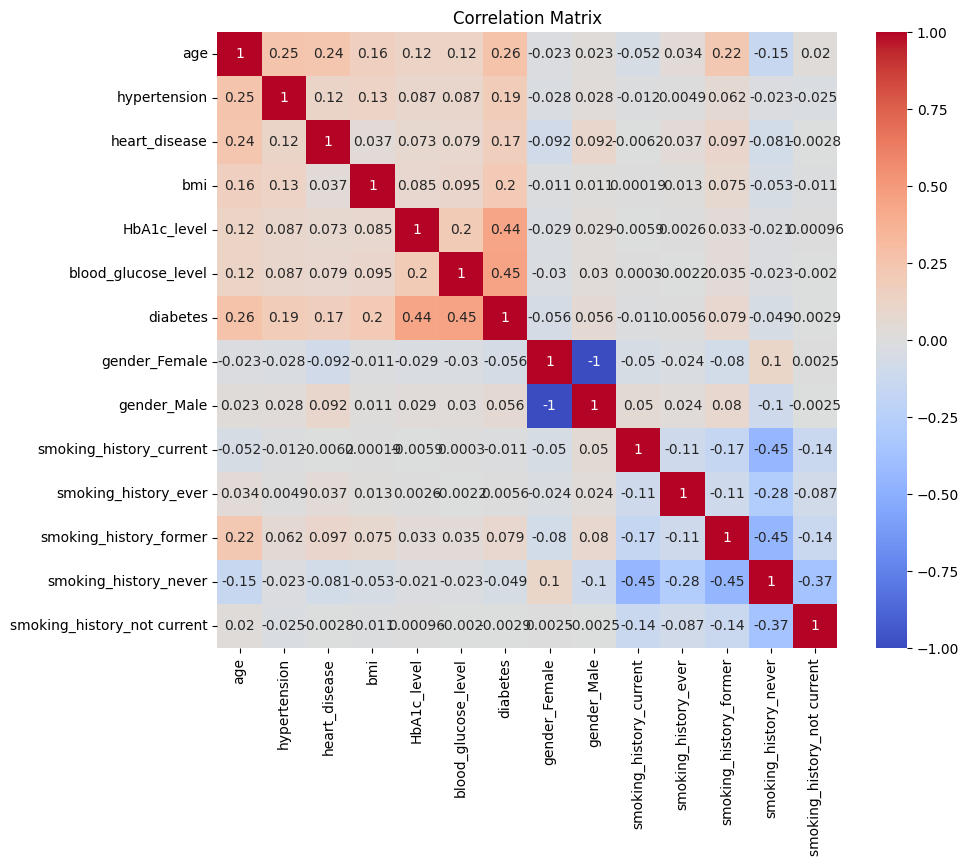

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns to encode
categorical_columns = ['gender', 'smoking_history']

# Perform one-hot encoding on categorical columns
encoded_df = pd.get_dummies(df, columns=categorical_columns)

# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation Matrix')

# Display the plot
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


# Select the relevant attributes for the model
selected_attributes = ['gender', 'age', 'hypertension', 'heart_disease',
                       'smoking_history', 'bmi', 'HbA1c_level',
                       'blood_glucose_level', 'diabetes']

# Filter the DataFrame to include only the selected attributes
filtered_df = df[selected_attributes]

# Remove rows with missing values, if necessary
filtered_df.dropna(inplace=True)
filtered_df.drop("HbA1c_level", axis=1)
filtered_df.drop("blood_glucose_level", axis=1)


# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
filtered_df['gender'] = le.fit_transform(filtered_df['gender'])
filtered_df['smoking_history'] = le.fit_transform(filtered_df['smoking_history'])

print(filtered_df)

# Split the data into features and target
X = filtered_df.drop('diabetes', axis=1)
y = filtered_df['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                0  27.32   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                 

[[-8.41046744e-01  1.69270354e+00 -2.84439447e-01 ... -3.21055792e-01
   1.00170572e+00  4.77042159e-02]
 [-8.41046744e-01  5.38006427e-01 -2.84439447e-01 ... -1.15583678e-04
   1.00170572e+00 -1.42620999e+00]
 [ 1.18723364e+00 -6.16690686e-01 -2.84439447e-01 ... -1.15583678e-04
   1.61108022e-01  4.89878478e-01]
 ...
 [ 1.18723364e+00  1.07094356e+00 -2.84439447e-01 ...  7.67292549e-02
   1.61108022e-01  4.16182767e-01]
 [-8.41046744e-01 -7.94336396e-01 -2.84439447e-01 ...  1.22036126e+00
  -1.42668764e+00 -9.34905254e-01]
 [-8.41046744e-01  6.71240710e-01 -2.84439447e-01 ... -7.36921977e-01
   1.00170572e+00 -1.18055762e+00]]


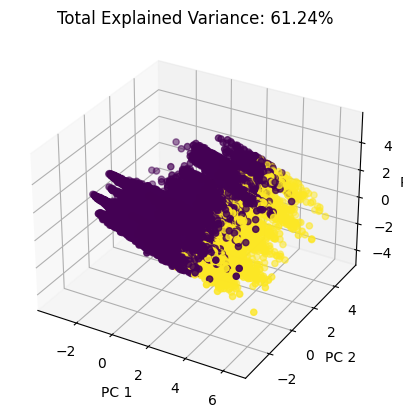

In [76]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler


X2 = df.drop('diabetes', axis=1)

scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

print(X2)

# Perform PCA on the feature data
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X2)

# Get the principal components
pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]
pc3 = X_pca[:, 2]

# Create a scatter plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc1, pc2, pc3, c=df['diabetes'])

# Set the axis labels
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

# Set the title
total_var = sum(pca.explained_variance_ratio_) * 100
ax.set_title(f'Total Explained Variance: {total_var:.2f}%')

# Show the plot
plt.show()

In [21]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming your data is stored in a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame

# Create the Keras model
model = Sequential()

model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))

model.summary()

Epoch 1/10


2023-07-07 09:03:44.876005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4576/4576 [==============================] - ETA: 0s - loss: 1.2739 - accuracy: 0.6842

2023-07-07 09:04:15.112657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4576/4576 [==============================] - 32s 7ms/step - loss: 1.2739 - accuracy: 0.6842 - val_loss: 0.5771 - val_accuracy: 0.6965
Epoch 2/10
4576/4576 [==============================] - 31s 7ms/step - loss: 0.4535 - accuracy: 0.7899 - val_loss: 0.4250 - val_accuracy: 0.8156
Epoch 3/10
4576/4576 [==============================] - 33s 7ms/step - loss: 0.3875 - accuracy: 0.8324 - val_loss: 0.2925 - val_accuracy: 0.9089
Epoch 4/10
4576/4576 [==============================] - 32s 7ms/step - loss: 0.3456 - accuracy: 0.8516 - val_loss: 0.3766 - val_accuracy: 0.8280
Epoch 5/10
4576/4576 [==============================] - 33s 7ms/step - loss: 0.3220 - accuracy: 0.8588 - val_loss: 0.3750 - val_accuracy: 0.8214
Epoch 6/10
4576/4576 [==============================] - 33s 7ms/step - loss: 0.3040 - accuracy: 0.8655 - val_loss: 0.2690 - val_accuracy: 0.8736
Epoch 7/10
4576/4576 [==============================] - 32s 7ms/step - loss: 0.2982 - accuracy: 0.8656 - val_loss: 0.3290 - val_accuracy: 0.8

625/625 [==============================] - 2s 4ms/step - loss: 0.3072 - accuracy: 0.8550
Test Loss: 0.30718785524368286
Test Accuracy: 0.8549500107765198
625/625 [==============================] - 1s 2ms/step


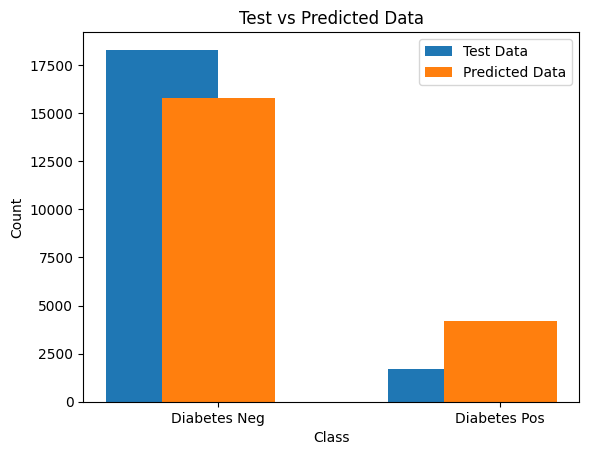

In [35]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained the model and obtained the predictions

# Convert the predictions to binary values (0 or 1)
predicted_classes = np.round(model.predict(X_test)).flatten()

# Count the number of occurrences for each class in the test data
test_counts = np.bincount(y_test)

# Count the number of occurrences for each class in the predicted data
predicted_counts = np.bincount(predicted_classes.astype(int))

# Calculate the x-axis positions for the bars
x_test = np.arange(len(test_counts))
x_predicted = x_test + 0.2  # Adjust the position of the predicted bars slightly

# Create a bar plot for the test data
plt.bar(x_test, test_counts, width=0.4, label='Test Data')

# Create a bar plot for the predicted data
plt.bar(x_predicted, predicted_counts, width=0.4, label='Predicted Data')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Test vs Predicted Data')
plt.legend()

# Adjust the x-axis ticks and labels
plt.xticks(x_test + 0.2, ['Diabetes Neg', 'Diabetes Pos'])

# Display the plot
plt.show()





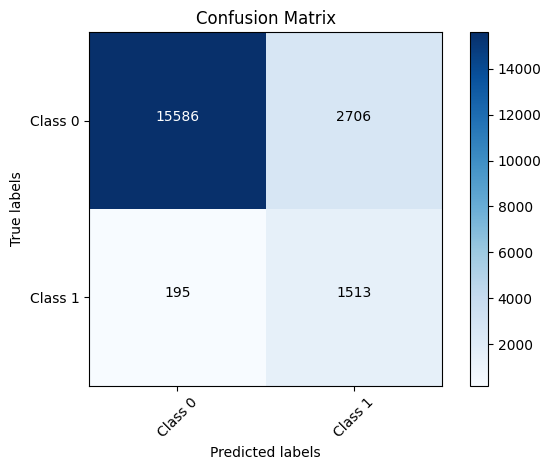

In [50]:
from sklearn.metrics import confusion_matrix


# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot the confusion matrix as an image
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add colorbar
plt.colorbar()

# Add labels, title, and ticks
classes = ['Class 0', 'Class 1']  # Replace with your class labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Display the plot
plt.tight_layout()
plt.show()